### Stock Market Prediction And Forecasting Using  LSTM Jupyter notebook

## Stock Prediction :
Take stock price of any company you
want and predicts its price by using LSTM.
Use only Jupyter notebook code.

In [10]:
# =============================================================================
# Importing the libraries
# =============================================================================
import numpy as np # Data Handling
import matplotlib.pyplot as plt # Data Visualization
import pandas as pd # # Data Handling
import os # Working Directory
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # Transformation of Categorical columns into Numerical Values
from sklearn.compose import ColumnTransformer # Transformation same as level encoding and one hotencoding
from sklearn.model_selection import train_test_split # Splitting Data into Train & Test
from sklearn.preprocessing import StandardScaler # Neural Networks --> generally standarize the data
from sklearn.metrics import confusion_matrix # Model Evaluation
from sklearn.metrics import classification_report # Model Evaluation
import keras # Deep Learning Framework
from keras.models import Sequential # Adding layers in the Neural Network
from keras.layers import Dense # Adding layers in the Neural Network

In [11]:
# =============================================================================
# Importing the dataset
# =============================================================================
df = pd.read_csv('/content/sample_data/date_6_interpol.csv')


In [12]:
# =============================================================================
# EDA of the Data
# =============================================================================
df.head()

,date,val
0,01/01/1990 00:00,0.525486
1,01/02/1990 00:00,0.523972
2,01/03/1990 00:00,0.526316
3,01/04/1990 00:00,0.523834
4,01/05/1990 00:00,0.527426


In [13]:
df.tail()

,date,val
7483,06/28/2010 00:00,0.730941
7484,06/29/2010 00:00,0.734498
7485,06/30/2010 00:00,0.733708
7486,07/01/2010 00:00,0.736223
7487,07/02/2010 00:00,0.737300


In [14]:
#Shape
df.shape

(7488, 2)

In [15]:
#Inforrmation about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7488 entries, 0 to 7487
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    7488 non-null   object 
 1   val     7488 non-null   float64
dtypes: float64(1), object(1)
memory usage: 117.1+ KB


In [16]:
#Checking missing values across features
df.isnull().sum()

date    0
val     0
dtype: int64

In [17]:
# =============================================================================
# Data Processing
# =============================================================================

In [18]:
df1 = df.reset_index()['val']

In [19]:
df1

0       0.525486
1       0.523972
2       0.526316
3       0.523834
4       0.527426
          ...   
7483    0.730941
7484    0.734498
7485    0.733708
7486    0.736223
7487    0.737300
Name: val, Length: 7488, dtype: float64

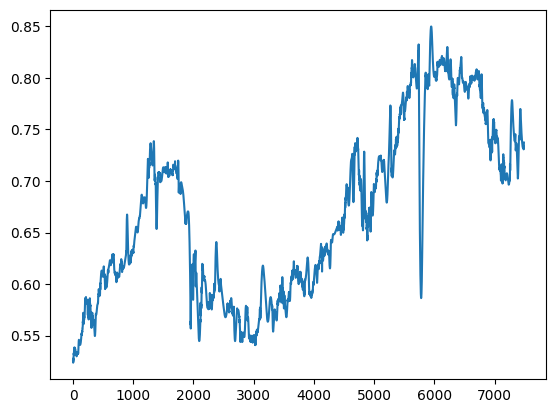

In [20]:
plt.plot(df1)

In [21]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [22]:
df1

0       0.525486
1       0.523972
2       0.526316
3       0.523834
4       0.527426
          ...   
7483    0.730941
7484    0.734498
7485    0.733708
7486    0.736223
7487    0.737300
Name: val, Length: 7488, dtype: float64

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [24]:
print(df1)

[[5.06507050e-03]
 [4.23111216e-04]
 [7.60986984e-03]
 ...
 [6.43478575e-01]
 [6.51189623e-01]
 [6.54491730e-01]]


In [25]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [26]:
training_size,test_size

(4867, 2621)

In [27]:
train_data

array([[5.06507050e-03],
       [4.23111216e-04],
       [7.60986984e-03],
       ...,
       [4.24257908e-01],
       [4.18358880e-01],
       [4.31003160e-01]])

In [28]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [29]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [30]:
print(X_train.shape), print(y_train.shape)

(4766, 100)
(4766,)


(None, None)

In [31]:
print(X_test.shape), print(ytest.shape)

(2520, 100)
(2520,)


(None, None)

In [32]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [33]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [34]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=20,batch_size=64,verbose=1)

Epoch 1/20
75/75 [==============================] - 23s 223ms/step - loss: 0.0046 - val_loss: 0.0022
Epoch 2/20
75/75 [==============================] - 14s 190ms/step - loss: 7.4912e-04 - val_loss: 0.0017
Epoch 3/20
75/75 [==============================] - 15s 204ms/step - loss: 6.1847e-04 - val_loss: 0.0012
Epoch 4/20
75/75 [==============================] - 15s 207ms/step - loss: 4.7431e-04 - val_loss: 0.0013
Epoch 5/20
75/75 [==============================] - 14s 190ms/step - loss: 3.8716e-04 - val_loss: 0.0012
Epoch 6/20
75/75 [==============================] - 15s 197ms/step - loss: 3.2537e-04 - val_loss: 9.4355e-04
Epoch 7/20
75/75 [==============================] - 15s 194ms/step - loss: 2.6093e-04 - val_loss: 4.9721e-04
Epoch 8/20
75/75 [==============================] - 14s 190ms/step - loss: 2.3243e-04 - val_loss: 8.9073e-04
Epoch 9/20
75/75 [==============================] - 14s 191ms/step - loss: 2.2624e-04 - val_loss: 3.4600e-04
Epoch 10/20
75/75 [========================

In [38]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

79/79 [==============================] - 3s 39ms/step


In [39]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [40]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.3382613357174677

In [41]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

0.1011588056409593

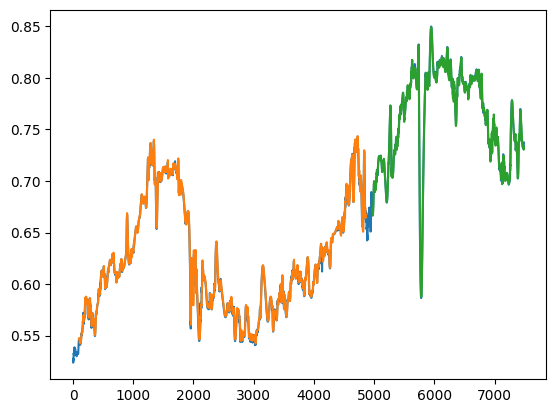

In [42]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [43]:
len(test_data)

2621

In [44]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 2280)

In [45]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [46]:
temp_input

[0.47591797645061384,
 0.47573387061388916,
 0.47587955582512786,
 0.4763550320843304,
 0.4771602993914963,
 0.47829535774662557,
 0.4797602071497191,
 0.4815548476007756,
 0.48367927909979636,
 0.4861335016467805,
 0.48891751524172755,
 0.4920313198846389,
 0.49547491557551315,
 0.4992483023143517,
 0.5033514801011536,
 0.5077844489359193,
 0.5125472088186485,
 0.517639759749341,
 0.5230621017279977,
 0.5288142347546174,
 0.5348961588292018,
 0.5413078739517483,
 0.548049380122259,
 0.5551206773407336,
 0.5625217656071719,
 0.5702526449215737,
 0.5783133152839388,
 0.5851812074811396,
 0.583930269973792,
 0.5856503090463947,
 0.5886335497195538,
 0.591910402533794,
 0.5954265704023116,
 0.599182053325108,
 0.6031768513021818,
 0.6074109643335348,
 0.6118843924191644,
 0.6165971355590723,
 0.6215491937532585,
 0.6267405670017225,
 0.6321712553044645,
 0.6378412586614843,
 0.6437505770727825,
 0.6498992105383581,
 0.656287159058212,
 0.6629144226323438,
 0.6697810012607539,
 0.676886894

In [47]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [48]:
import matplotlib.pyplot as plt

In [49]:
len(df1)

7488

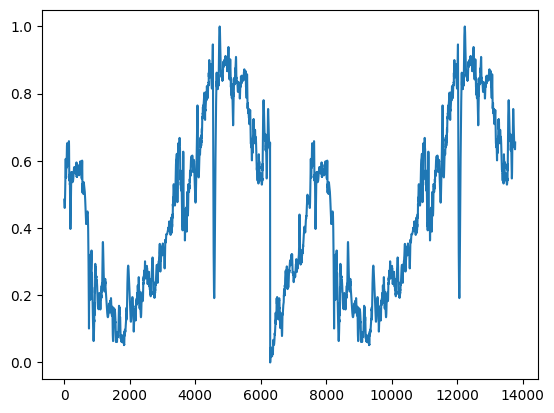

In [52]:
df3=df1.tolist()
df3.extend(df3)
plt.plot(df3[1200:])

In [53]:
df3=scaler.inverse_transform(df3).tolist()

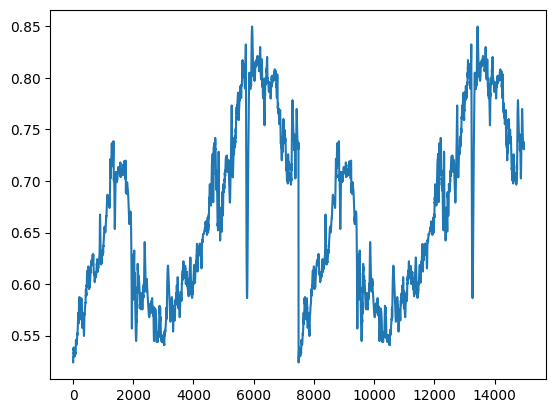

In [54]:
plt.plot(df3)

In [60]:
df3[-150:]


[[0.739284],
 [0.740826],
 [0.743273],
 [0.7423],
 [0.743901],
 [0.743901],
 [0.7454430000000001],
 [0.740881],
 [0.73645],
 [0.735713],
 [0.734646],
 [0.734422],
 [0.734422],
 [0.729703],
 [0.7302229999999998],
 [0.7316333115212491],
 [0.7328705394224247],
 [0.7339346837035268],
 [0.7348257443645557],
 [0.7355437214055106],
 [0.7360886148263923],
 [0.7364604246272006],
 [0.7366591508079353],
 [0.7366847933685964],
 [0.7365373523091842],
 [0.7362168276296985],
 [0.7357232193301392],
 [0.7350565274105064],
 [0.7342167518708003],
 [0.7332038927110207],
 [0.7320179499311674],
 [0.7306589235312407],
 [0.7291268135112405],
 [0.7274216198711669],
 [0.7255433426110197],
 [0.7234919817307989],
 [0.7212675372305049],
 [0.7188700091101374],
 [0.7162993973696963],
 [0.7136148357337402],
 [0.7111711265496212],
 [0.7090274035418971],
 [0.7071836667105686],
 [0.7056399160556355],
 [0.7043961515770979],
 [0.7034523732749554],
 [0.7028085811492084],
 [0.7024647751998567],
 [0.7024209554269004],
 [0.70